## Piecewise interpolation - Spline

- Polynomial interpolation 
  - Lagrange interpolation, OK
  - Linar, Cuadratic interpolation, OK 
  - Hermite interpolation (divided differences)  NOT DONE YET
- Spline interpolation

<img src="imgs/polynomial_vs_spline.png" width="600" />

* Polynomial Interpolation: ONE unique $n^{th}$ order polynomial passes through n points.
  * Newton’s Divided Difference Interpolating Polynomials
  * Lagrange Interpolating Polynomials

* Spline Interpolation: Pass different curves (mostly 3rd order - cubic) through different subsets of the data points.


## Spline - Piecewise interpolation (Linear, Quadratic, Cubic)
* why is it called spline: spline is a thin flexible stripe of wood, hard rubber, metal or plastic that is used to connect ends of elements or bend on support points (used in architecture long time ago to make smooth curves):


<img src="imgs/spline_wood2.png" height="600" />


* in case of Lagrange interpolation the degree of the interpolating polynomial is directly linked to the number of data points!!! 

  * if we have n points we can make (n-1) order Lagrange polynomial
  
* the difference between other previous interpolaton methods: in spline interpolation instead of finding a single polynomial that fits the given data, we find one low-degree polynomial that fits every $\color{red}{\text{pair of data}}$ (pair of data - thats why is also called ***piecewise interpolation** - interpolate "piece by piece")

* in other words each pair of data is a new polynomial


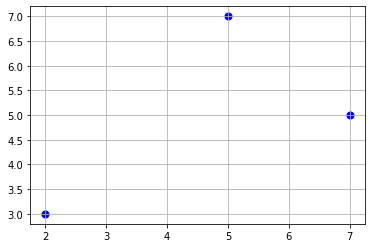

In [1]:
# Lets look at three points
import numpy as np
import matplotlib.pyplot as plt
x=np.array([2,5,7])
y=np.array([3,7,5])
fig, ax = plt.subplots(1,1)
ax.scatter(x,y,c='blue',s=50)
ax.grid()

# Linear Spline

<img src="imgs/linear_spline.png" width="300" />

* Two straight (linear) pieces 
   * $x=(x_{i-1},x_i,x_{i+1})=(2,5,7)$
   * $y=(y_{i-1},y_i,y_{i+1})= (3,7,5)$
   
   
   

$$P (x) = ax + b $$
$$Q (x) = cx + d $$
    
We can find the coefficients a, b, c, d by solving

$$P (x_{i−1} ) = y_{i−1}$$
$$P (x_i ) = y_i$$
$$Q(x_i ) = y_i$$
$$Q(x_{i+1} ) = y_{i+1}$$

which is a system of four equations and four unknowns. 

$$2a+b=3$$
$$5a+b=7$$

$$5c+d=7$$
$$7c+d=5$$


* we have not done yet python for system of linear equations so
* for quick math solutions one could use:
https://www.wolframalpha.com

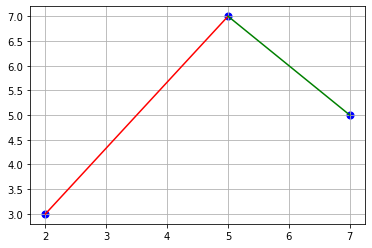

In [2]:
# Lets look at three points
import numpy as np
import matplotlib.pyplot as plt
x=np.array([2,5,7])
y=np.array([3,7,5])

x_P_lin=np.linspace(2,5,10)
y_P_lin=4/3*x_P_lin+1/3

x_Q_lin=np.linspace(5,7,10)
y_Q_lin=-1*x_Q_lin+12

fig, ax = plt.subplots(1,1)
ax.scatter(x,y,c='blue',s=50)
ax.plot(x_P_lin,y_P_lin,'-r')
ax.plot(x_Q_lin,y_Q_lin,'-g')

ax.grid()


# Cuadratic Spline

One disadvantage of linear spline interpolation is the lack of smoothness. The first derivative of the spline is not continuous at the nodes (unless the data fall on a line). We can obtain better
smoothness by increasing the degree of the piecewise polynomials. In quadratic spline interpolation, we connect the nodes via second degree polynomials.

<img src="imgs/quadratic_spline.png" width="300" />

Again we search for two polynomials but this time second order:
* $P(x) = a_0 + a_1x + a_2 x^2$ 
* $Q(x) = b_0 + b_1 x + b_2 x^2$. 

There are six unknowns to determine, but only four equations from the interpolation conditions: 

$$P (x_{i−1} ) = y_{i−1}$$
$$P (x_i ) = y_i$$
$$Q(x_i ) = y_i$$
$$Q(x_{i+1} ) = y_{i+1}$$

We can find extra two conditions by requiring some smoothness, 
$$P'(x_i) = Q'(x_i) $$

and another equation by requiring $P'$ or $Q'$ take a certain value at one of the end points.


# CUBIC SPLINE 
This is the most common spline interpolation!

<img src="imgs/cubic_spline.png" width="400" />

* very often we want the points to connect in the most smooth way. 
* spline can use the condition of smooth continuity (smooth transition) at each point and get the best interpolation
* linear piecewise elements are continuous but not differentiable (because of the sharp angles)
* mathematically smooth means that at each point the first and second derivatives match
* cubic makes the connection with the points "more smooth" 
* so we are left with two choices: quadratic and cubic - 
* cubic polynomial better satisfies the smoothness for the first and second derivative
* one can imagine two rods pointing in the same direction - one can connect them smoothly only with at least third degree polynomial 

(2.0, 20.0)

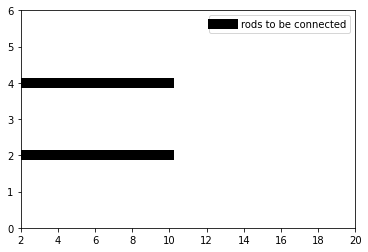

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x1=np.linspace(1,10,10)
y1=np.linspace(2,2,10)

x2=np.linspace(1,10,10)
y2=np.linspace(4,4,10)

fig,ax=plt.subplots(1,1)
ax.plot(x1,y1,'-k',lw=10,label='rods to be connected')
ax.plot(x2,y2,'-k',lw=10)
ax.legend()
ax.set_ylim(0,6)
ax.set_xlim(2,20)

## Example of manual calculation of two polynomials for Cubic Spline interpolation

### Lets choose some three points (different than previously)

Let say the points are: 

$(x_1 = 0, y_1 = 0)$ 

$(x_2 = 1, y_2 = 1)$ 

$(x_3 = 2, y_3 = 0) $

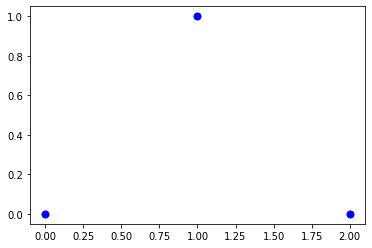

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array([0,1,2])
y=np.array([0,1,0])
fig, axes = plt.subplots(1,1)
axes.scatter(x,y,c='blue',s=50)



The general third order polynomials are:
$$ S_0(x) = a_0 + b_0x + c_0x^2 + d_0x^3 $$
$$ S_1(x) = a_1 + b_1x + c_1x^2 + d_1x^3 $$

We have here 8 variables to find $a_0... d_1$, but we already know some things about those equations.

The interpolation equations are:
$$ S_0(0) = 0 \rightarrow a_0 = 0 $$

$$ S_0(1) = 1 \rightarrow a_0 + b_0 + c_0 + d_0 = 1 $$
$$ S_1(1) = 1 \rightarrow a_1 + b_1 + c1 + d1 = 1 $$
$$ S_1(2) = 0 \rightarrow a_1 + 2b_1 + 4c_1 + 8d_1 = 0 $$



We need derivative for other four equations:


$$S'_0(x) = b_0 + 2c_0 x + 3d_0x^2$$
$$S'_1(x) = b_1 + 2c_1 x + 3d_1x^2$$
$$S''_0(x) = 2c_0 + 6d_0 x$$
$$S''_1(x) = 2c_1 + 6d_1 x$$

then smoothness conditions (***mathematically*** smoothness means that the first and second derivatives at the point of joining the two polynomials must be equal):

$$ S'_0(1) = S'_1(1)     \rightarrow  b_0 + 2c_0 + 3d_0 = b_1 + 2c_1 + 3d_1 $$
$$ S''_0 (1) = S''_1 (1) \rightarrow 2 c_0 + 6d_0 = 2c_1 + 6d_1 $$

And the boundary condition (boundary means that the second derivatives at the end point of each of the two polynomials must be zero) :
$$ S''_0 (0) = 0 \rightarrow 2 c_0 = 0 $$
$$ S''_1 (2) = 0 \rightarrow 2 c_1 + 12d_1 = 0 $$


There are eight equations and eight unknowns. However, a0 = c0 = 0, so that reduces the number of equations and unknowns to six. We rewrite the equations below, substituting a0 = c0 = 0, and simplifying when possible:


$$ b_0 + d_0 = 1 $$
$$ a_1 + b_1 + c_1 + d_1 = 1 $$
$$ a_1 + 2b_1 + 4c_1 + 8d_1 = 0 $$
$$ b_0 + 3d_0 -b1 + 2c_1 + 3d_1 = 0  $$
$$ 3d_0 -c_1 + 3d_1 = 0  $$
$$ c_1 + 6d_1 = 0 $$ 

* that can be simply solved using linear algebra methods:

$$ Ax = v $$ 

with: np.linalg.solve(A, v) # which we will do in next classes


$$ S_0(x) = 1.5x  - 0.5x^3 $$ 
$$ S_1(x) =  - 1 + 4.5x  -3x^2 + 0.5x^3 $$ 

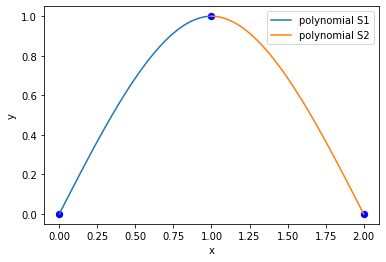

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array([0,1,2])
y=np.array([0,1,0])

xs1=np.linspace(0,1,100)
xs2=np.linspace(1,2,100)

S0 = 1.5*xs1 - 0.5*xs1**3.0
S1 = -1.0 + 4.5*xs2 - 3*xs2**2.0 + 0.5*xs2**3.0
fig, axes = plt.subplots(1,1)
axes.scatter(x,y,c='blue',s=40)
axes.plot(xs1,S0,label='polynomial S1')
axes.plot(xs2,S1,label='polynomial S2')
axes.legend()
axes.set_xlabel('x')
axes.set_ylabel('y')
plt.show()


### Numerical example using scipy build in functions
* scipy.interpolate.interp1d uses ***spline*** for different order:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html

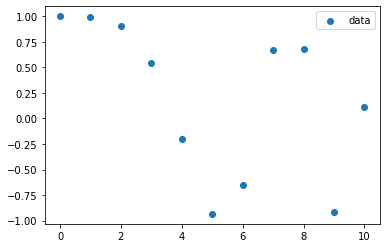

In [6]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,4,5,6,7,8,9,10],dtype='float')
y = np.cos(-x**2/9.0)
fig,ax=plt.subplots(1,1)
ax.scatter(x, np.cos(-x**2/9.0), label="data")

ax.legend()


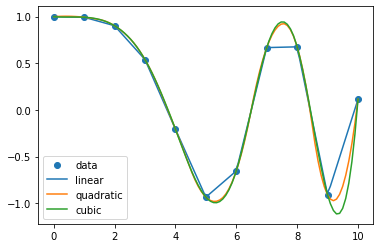

In [7]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,4,5,6,7,8,9,10],dtype='float')
#y = np.sin(x)
y = np.cos(-x**2/9.0)

# this class returns a function:

fspline1 = interp1d(x, y, kind='linear')
fspline2 = interp1d(x, y, kind='quadratic')
fspline3 = interp1d(x, y, kind='cubic')

# make new intermediate points
xdata = np.linspace(0, 10, 100)

fig, ax = plt.subplots(1,1)
ax.scatter(x, np.cos(-x**2/9.0), label="data")

# evaluate the function at the new points
ax.plot(xdata, fspline1(xdata), label='linear')
ax.plot(xdata, fspline2(xdata), label='quadratic')
ax.plot(xdata, fspline3(xdata), label='cubic')

ax.legend()
plt.show()

### Using scipy.interpolate.interp1d is so simple that is almost boring,
but there are some more interesting applications (coming soon!)
* which we will do on Friday
* also on Friday the last type of interpolation: Hermite Interpolation
* plus more interesting homework

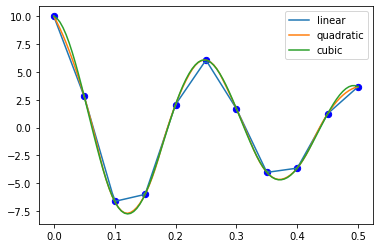

In [8]:
x = np.linspace(0, 0.5, 11)
A, nu, k = 10, 4, 2
y = A * np.exp(-k*x) * np.cos(2*np.pi * nu * x)

xdata = np.linspace(0, 0.5, 100)
ydata = A * np.exp(-k*xdata) * np.cos(2*np.pi * nu * xdata)

# h
spline1 = interp1d(x, y, kind='linear')
spline2 = interp1d(x, y, kind='quadratic')
spline3 = interp1d(x, y, kind='cubic')


fig, ax = plt.subplots(1,1)
ax.scatter(x,y,c='blue',s=40)

ax.plot(xdata, spline1(xdata), label='linear')
ax.plot(xdata, spline2(xdata), label='quadratic')
ax.plot(xdata, spline3(xdata), label='cubic')

ax.legend()
